**Firmingham dataset**

Trata-se de um dataset no qual um estudo cardiovascular de 4240 pacientes e 15 atributos. A task de classificação é predizer se um paciente tem risco de desenvolver problemas no coração nos próximos 10 anos

---

**Atributos**

Gender - 0 mulher e 1 homem (binário)

Age - Idade do paciente (Inteiro)

Education - 1 a 4 categorias

CurrentSmoker - Indica se o paciente atualmente é fumante. 0 não 1 sim (binário)

cigsPerDay - número de cigarros por dia (Inteiro)

BPMeds - Indica se o paciente toma regularmente medicação para pressão. 0 não 1 sim (binário)

Prevalent Stroke - Indica se o paciente teve algum AVC (binário).

Prevalent Hyp - Indica se o paciente é hipertenso (binário).

Diabetes - Indica se o paciente é diabético (binário).

Colesterol total - Colesterol medido do paciente (Inteiro)

sysBP - pressão sistólica (Inteiro)

diaBP - pressão diastólica (Inteiro)

BMI - Indice de massa corpórea (Float)

heartRate - Batimentos cardíacos (Inteiro)

glucose - Índice de glucose (Inteiro)

---








In [ ]:
!pip install biokit;
!pip install imblearn;

In [ ]:
#Biblioteca para leitura do banco no github
import requests
# Biblioteca de manipulação de dados
import pandas as pd
#Biblioteca de manipulação matemática
import numpy as np
# Biblioteca para plots 
import matplotlib.pyplot as plt
#Biblioteca para plots personalizados
import seaborn as sns
sns.set_theme(style="whitegrid")
#Biblioteca para plot da correlação
from biokit.viz import corrplot
# Biblioteca utilizada para feature importance
from sklearn.ensemble import RandomForestClassifier
# Biblioteca utilizada para normalização dos dados
from sklearn.preprocessing import StandardScaler
# Biblioteca para pca plot
from sklearn.decomposition import PCA
import matplotlib
# Biblioteca utilizada para subamostragem
from imblearn.under_sampling import ClusterCentroids
from collections import Counter
# Bibliotecas de classificação
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
# Biblioteca para cálculo de métricas
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
#Biliotecas utilizadas para testes estatísticos
from scipy.stats import ranksums
from scipy.stats import chi2_contingency
from scipy.stats import chi2

**Fase de leitura e pré-processamento**

Nesta fase, os seguintes passos são executados:


*   Visualização dos tipos de cada atributo
*   Identificação e remoção de valores inválidos





In [ ]:
# url do dataset a ser avaliado
framingham_dataset_url = 'https://raw.githubusercontent.com/Riccellisp/Teste/main/framingham.csv'

response = requests.get(framingham_dataset_url)

dest = 'framingham.csv'

with open(dest, 'wb') as file:
    file.write(response.content)

framingham_dataset = pd.read_csv(dest) 

# Size original
original_data_shape = framingham_dataset.shape

#Visualizando os tipos de cada feature
dtypes = framingham_dataset.dtypes

# Colunas do dataframe
framingham_columns = framingham_dataset.columns

#Contagem do número total de nan
count_nan = framingham_dataset.isnull().sum().sum()

if (count_nan):
    # Contando o número de nan por coluna 
    count_nan_in_df = framingham_dataset.isnull().sum()
    print (count_nan_in_df)
    
    framingham_dataset = framingham_dataset.dropna()
    framingham_dataset = framingham_dataset.reset_index(drop=True)
    
    count_nan = framingham_dataset.isnull().sum().sum()
    print ('Nan values - ' + str(count_nan))
    
new_shape = framingham_dataset.shape

print ('Num of tuples reduced: ',original_data_shape[0] - new_shape[0])

print ('Data reduced percent: ', new_shape[0]/original_data_shape[0] * 100)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Nan values - 0
Num of tuples reduced:  582
Data reduced percent:  86.27358490566037


**Observações**

Perder dados não é algo interessante para um cientista de dados. Assim, existem formas específicas de lidar com dados faltantes. Neste teste iremos utilizar a interpolação linear para features numericas e repetir a última educação para os dados faltantes desse atributo

In [ ]:
# Lendo csv
framingham_dataset = pd.read_csv(dest)

framingham_dataset['education'].fillna(method='ffill', inplace=True) 
framingham_dataset['cigsPerDay'].interpolate(method='pad', inplace=True)
framingham_dataset['BPMeds'].interpolate(method='pad', inplace=True)
framingham_dataset['totChol'].interpolate(method='pad', inplace=True)
framingham_dataset['BMI'].interpolate(method='pad', inplace=True)
framingham_dataset['glucose'].interpolate(method='pad', inplace=True)
framingham_dataset['heartRate'].interpolate(method='pad', inplace=True)



In [ ]:
framingham_dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Fase de descrição e visualização dos dados**

Após a leitura e pré-processamento dos dados, uma descrição sumária dos atributos, bem como  alguns gráficos são necessários.

In [ ]:
# Descrição sumária das colunas do dataset    
framingham_description = framingham_dataset.describe()
print(framingham_description)


              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000    4240.000000  4240.000000   
mean      0.429245    49.580189     1.981368       0.494104     9.019104   
std       0.495027     8.572942     1.020378       0.500024    11.933225   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029481         0.005896      0.310613     0.025708   236.721934   
std       0.169171         0.076569      0.462799     0.158280    44.598191   

**Análise Univariada**

Nesta etapa, dados de histogramas e boxplots de cada feature são realizados, visando melhor compreensão das distribuições

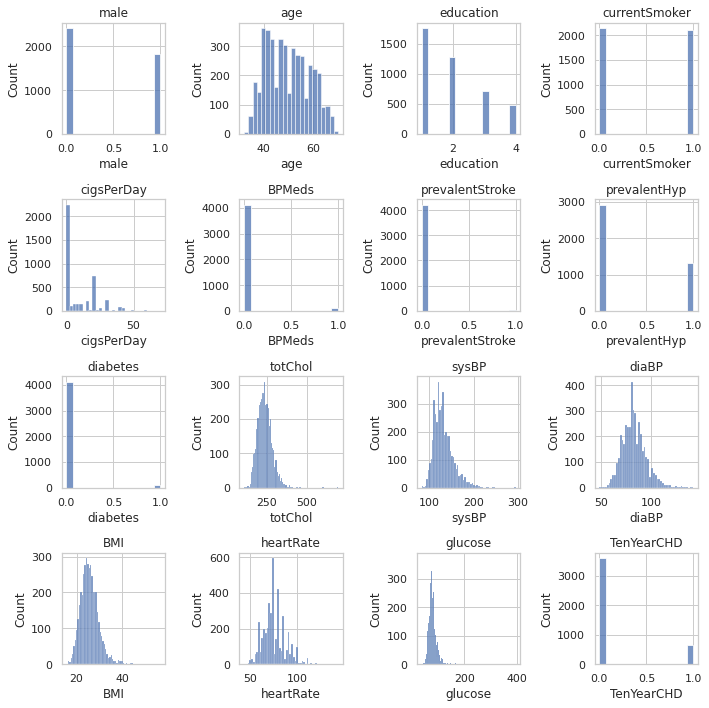

In [ ]:
fig=plt.figure(figsize=(10,10))
for number,column in enumerate(framingham_dataset.columns):
    ax=fig.add_subplot(4,4,number+1)
    palette = sns.cubehelix_palette(10,start=2,rot=0,dark=0,light=0.5)
    sns.histplot(framingham_dataset[column],palette=palette)
    # df[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

Nota-se que os dados categóricos do atributo referentes aos atuais fumantes são semelhantes aos que não são fumantes.

Além disso, nota-se um desbalanceamento entre as classes normais e patológicas, evidenciando um desafio na classificação destas classes

---

**Boxplot dos atributos**

Nesta etapa o objetivo é encontrar outliers nas features, bem como ver como estão distribuídas ao longo das amostras



---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

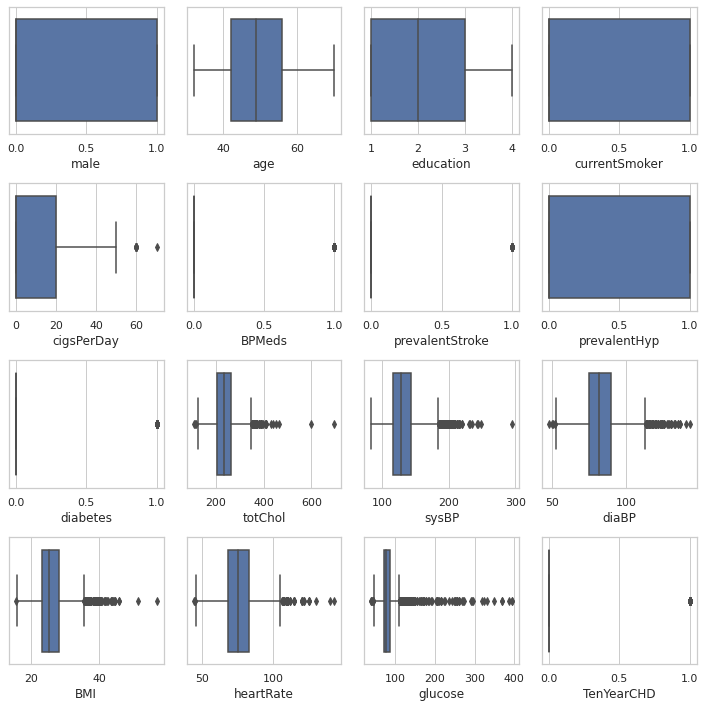

In [ ]:
fig=plt.figure(figsize=(10,10))
for number,column in enumerate(framingham_dataset.columns):
    ax=fig.add_subplot(4,4,number+1)
    sns.boxplot(framingham_dataset[column])
fig.tight_layout()
plt.show()

**Observações**

Nota-se que alguns atributos possuem outliers tais como a glucose, porém isso pode ser um comportamento normal, uma vez que diabéticos possuem picos de açucar no sangue altos que são relacionados a níveis altos de glucose. Comportamento semelhante para Heart Rate, SysBP, DiaBP e totChol.



**Análise multivariada**
Existem diversas formas de realizar análises multivariádas tais como:



1.   Pearson
2.   Spearman
3.   Testes estatísticos


Nesta etapa, a correlação de Pearson é utilizada

Computing correlation


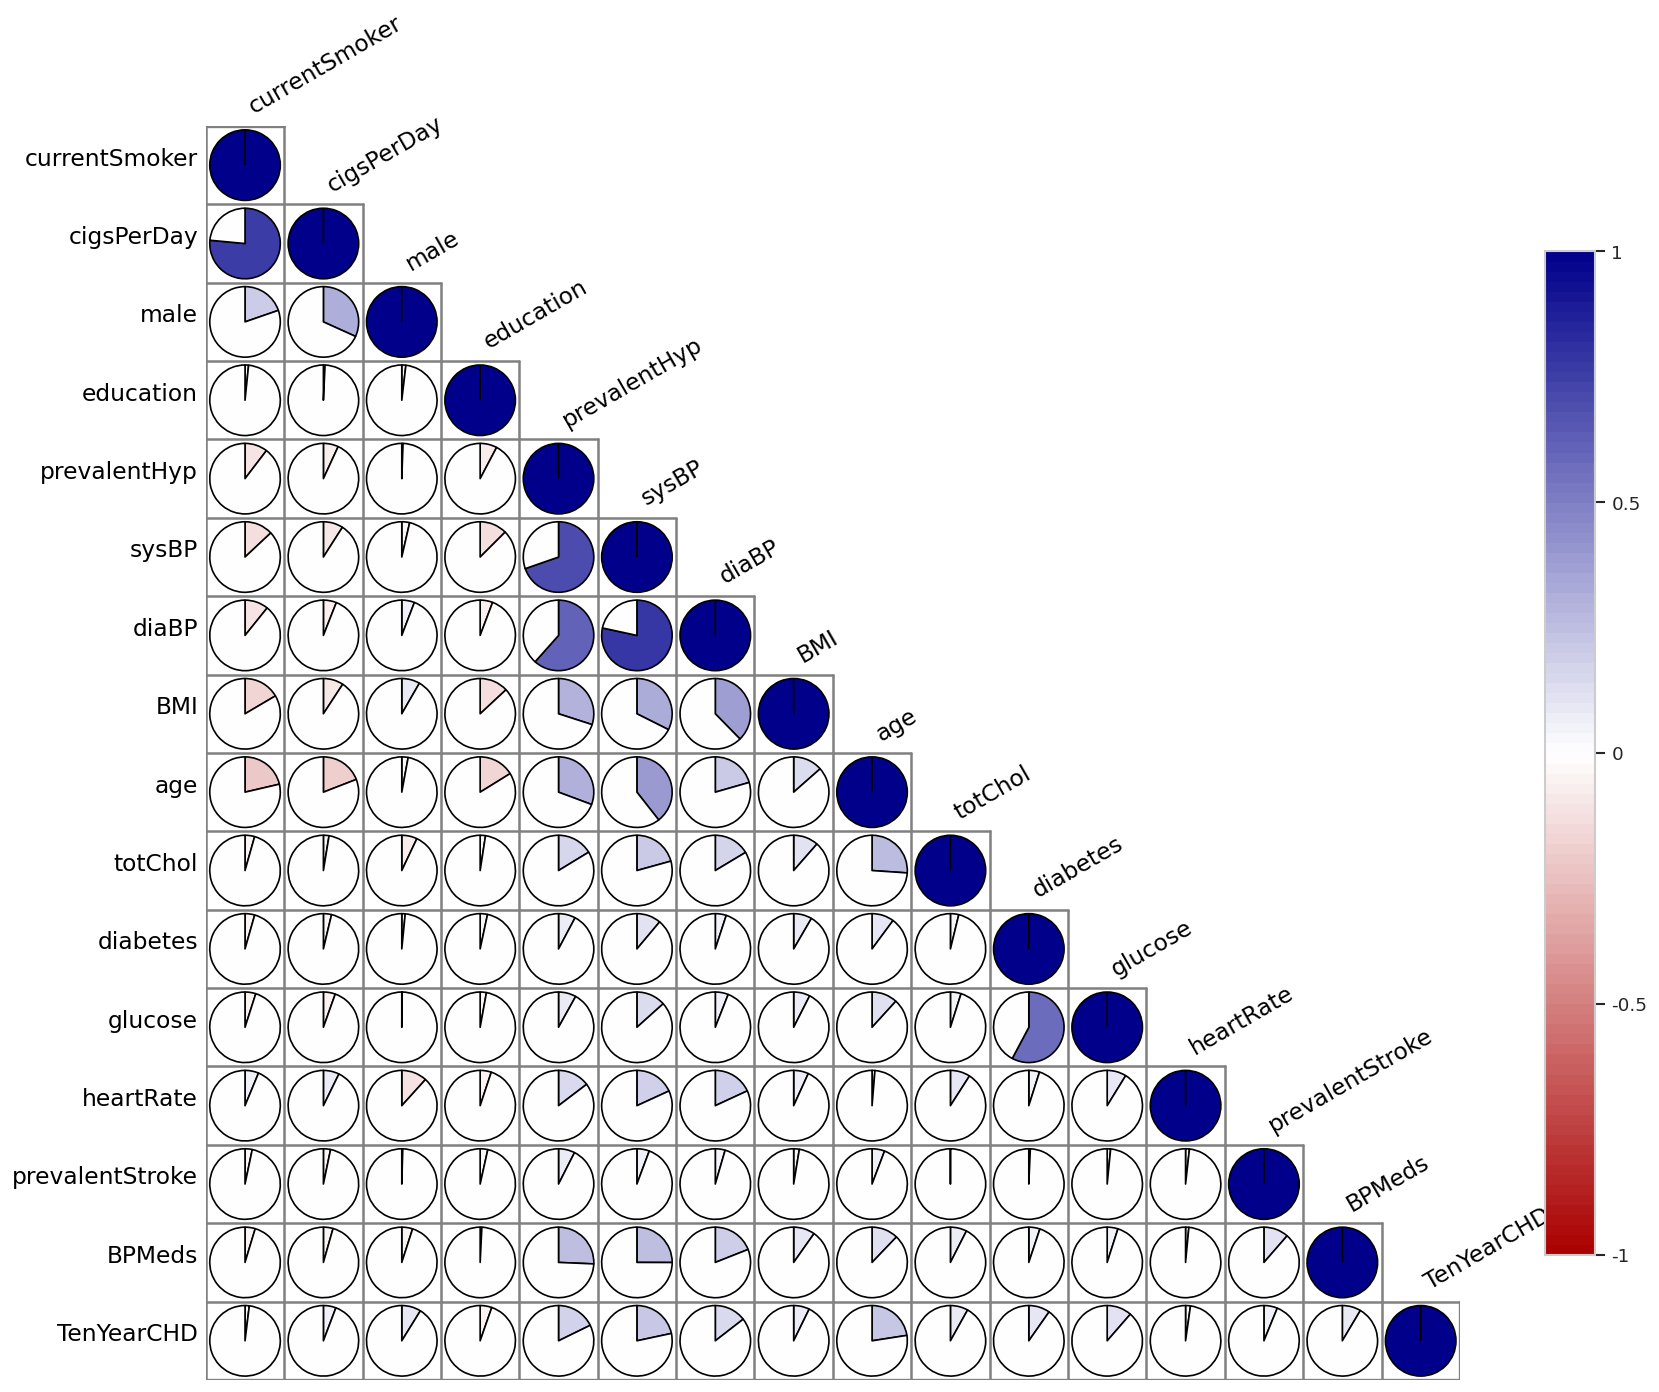

In [ ]:
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (15,12)
c = corrplot.Corrplot(framingham_dataset)
c.plot(colorbar=True,method='pie',fontsize=14,shrink=0.9,lower='pie');

**Observações**

Note que algumas features interessantes possuem alta correlação positiva. Aqui podemos citar:



1.   Current smoker e CigsPerDay
2.   SysBP e DisBP
3.   DiaBP e PrevalentHyp
4.   Doença cardíaca e age, DiaBP , SysBP e PrevalentHyp
5.   BMI e PrevalentHyp
6.   Diabetes e Glucose

Com base nessa análise, já podemos ver várias possibilidades com relação a nossa variável de interesse.

---



**Feature importance**

Entender a contribuição de cada feature com relação ao target é essencial para a redução de complexidade do problema. Desta forma, uma das formas de calcular a importâcia das features em um dataset é  atráves do MDI (Mean Decrease Impurity), um algoritmo o qual é baseado em random forests

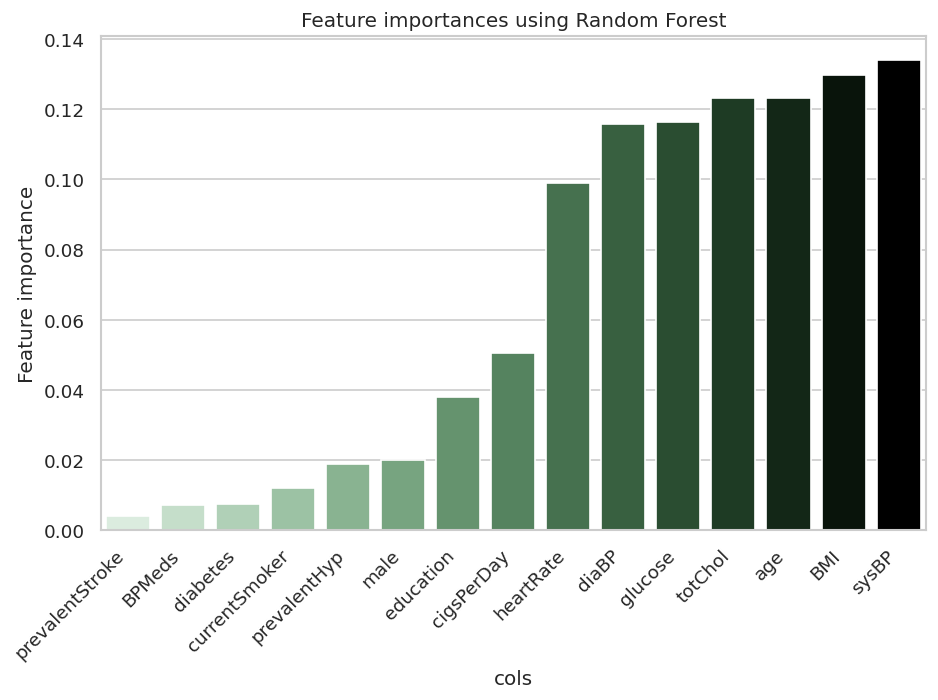

In [ ]:
y = framingham_dataset.loc[:,framingham_dataset.columns[-1]].values
    
x = framingham_dataset.drop(columns=framingham_dataset.columns[-1], axis=1)

x = StandardScaler().fit_transform(x)

forest = RandomForestClassifier(random_state=0)

forest.fit(x, y)

importances = forest.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


forest_importances = {'cols':framingham_dataset.columns[:-1].values,'importances':importances}
forest_importances = pd.DataFrame(forest_importances)



matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (8,6)
fig, ax = plt.subplots()
palette = sns.cubehelix_palette(15,start=2,rot=0,dark=0,light=0.9)
p = sns.barplot(x='cols',
            y="importances", 
            data=forest_importances, 
            order=forest_importances.sort_values('importances').cols, palette=palette)
p.set_xticklabels(p.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Feature importance")
fig.tight_layout()

**Observações**

Segundo o barplot, as features de heart rate, diaBP, totChol,glucose,age,BMI e sysBP são as mais importantes em termos classificação de risco cardíaco. A partir desses dados, podemos definir um limiar de importância para selecionar as features mais relevantes com determinado percentual.

---


**PCA plot**

Trata-se de uma técnica interessante para a visualização das duas componentes principais, indicando se há ou não separabilidade entre as classes de acordo com essas componentes mais significativas

Variância explicada acumulada [0.21257898 0.33770097]


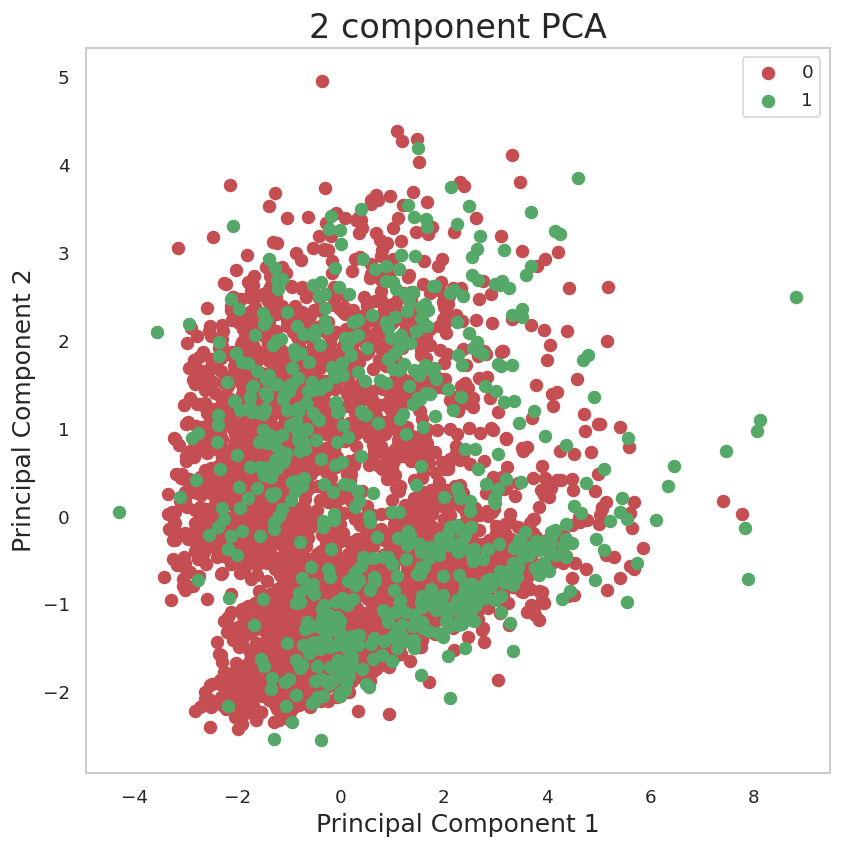

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
print ('Variância explicada acumulada',pca.explained_variance_ratio_.cumsum())
principal_df = pd.DataFrame(data = principal_components
              , columns = ['principal component 1', 'principal component 2'])

final_pca_df = pd.concat([principal_df, pd.DataFrame(y)], axis = 1)
final_pca_df.columns = ['principal component 1', 'principal component 2', 'label']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indices_to_keep = final_pca_df['label'] == target
    ax.scatter(final_pca_df.loc[indices_to_keep, 'principal component 1']
                , final_pca_df.loc[indices_to_keep, 'principal component 2']
                , c = color
                , s = 50)
ax.legend(targets)
ax.grid()    

**Observações**

É possível ver que a variância explicada das duas componentes principais ainda é baixa, indicando pouca representatividade com relação ao conjunto.

Nota-se ainda que a partir das duas componentes principais a separabilidade entre as classes ainda é complicada. Podemos listar algumas alternativas:



1.   TSNE plot - alternativa não linear para a PCA
2.   PCA3D para ver se a variância explicada é maior

---



**Classificação**

Nesta etapa o design experimental a ser avaliado levará em em conta o seguinte fluxo


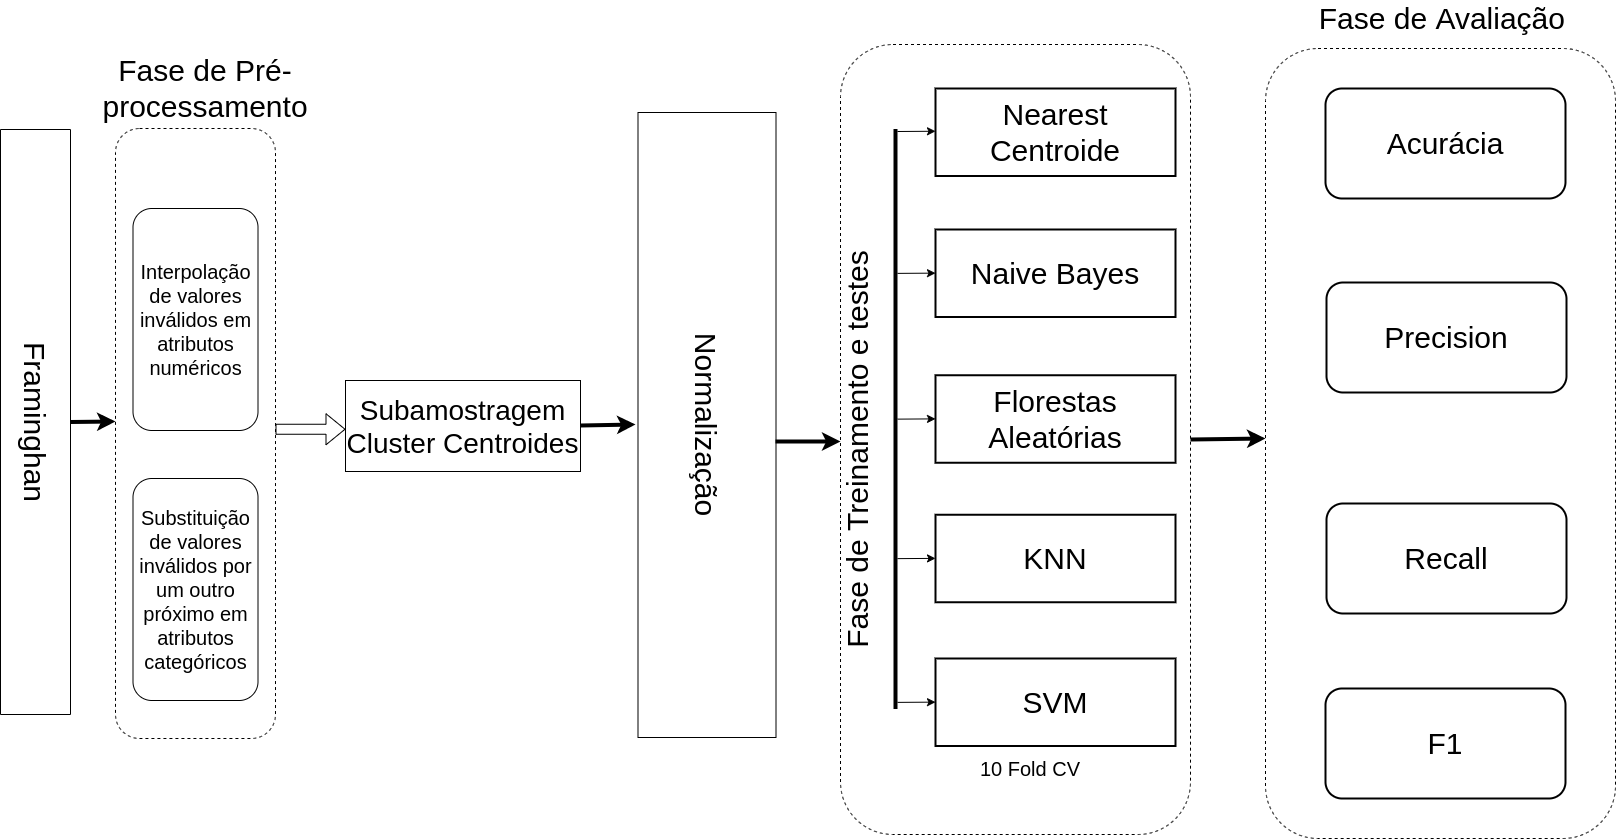

**Observações**

A subamostragem por Cluster Centroides é realizada para resolver o problema de desbalanceamento entre as classes.

Utiliza-se na fase de treinamento a validação cruzada 2 x 5x CV entre os classificadores KNN, SVM, Florestas Aleatórias, Naive Bayes e Nearest Centroide.

Na fase de avaliação utilizamos diversas métricas visando avaliar ambas as classes.

---

In [ ]:
y = framingham_dataset.loc[:,framingham_dataset.columns[-1]].values
    
x = framingham_dataset.drop(columns=framingham_dataset.columns[-1], axis=1)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

cc = ClusterCentroids(random_state=10)

acc_metrics = {"KNN":[], "NB": [], "NC": [], "RF": [], "SVM": []}
precision_metrics = {"KNN":[], "NB": [], "NC": [], "RF": [], "SVM": []}
recall_metrics = {"KNN":[], "NB": [], "NC": [], "RF": [], "SVM": []}
f1_metrics = {"KNN":[], "NB": [], "NC": [], "RF": [], "SVM": []}

for train_index, test_index in skf.split(x, y):
  
  x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
  y_train, y_test = y[train_index], y[test_index]

  scaler = StandardScaler()

  n_zeros = np.count_nonzero(y_train==0)
  n_ones = np.count_nonzero(y_train==1)

  x_reduced, y_reduced = cc.fit_resample(x_train, y_train)

  x_reduced = scaler.fit_transform(x_reduced)
  
  x_test = scaler.transform(x_test)

  knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
    
  knn.fit(x_reduced, y_reduced)
  y_pred = knn.predict(x_test)
  target_names = ['class 0', 'class 1']
  from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
  
  acc_metrics["KNN"].append(accuracy_score(y_test, y_pred))
  f1_metrics["KNN"].append(f1_score(y_test, y_pred))
  precision_metrics["KNN"].append(precision_score(y_test, y_pred))
  recall_metrics["KNN"].append(recall_score(y_test, y_pred))

  svm = SVC(kernel='rbf')
    
  svm.fit(x_reduced, y_reduced)
  y_pred = svm.predict(x_test)
  
  acc_metrics["SVM"].append(accuracy_score(y_test, y_pred))
  f1_metrics["SVM"].append(f1_score(y_test, y_pred))
  precision_metrics["SVM"].append(precision_score(y_test, y_pred))
  recall_metrics["SVM"].append(recall_score(y_test, y_pred))

  rf = RandomForestClassifier()
    
  rf.fit(x_reduced, y_reduced)
  y_pred = rf.predict(x_test)
  target_names = ['class 0', 'class 1']

  acc_metrics["RF"].append(accuracy_score(y_test, y_pred))
  f1_metrics["RF"].append(f1_score(y_test, y_pred))
  precision_metrics["RF"].append(precision_score(y_test, y_pred))
  recall_metrics["RF"].append(recall_score(y_test, y_pred))

  nb = GaussianNB()
    
  nb.fit(x_reduced, y_reduced)
  y_pred = nb.predict(x_test)
  target_names = ['class 0', 'class 1']

  acc_metrics["NB"].append(accuracy_score(y_test, y_pred))
  f1_metrics["NB"].append(f1_score(y_test, y_pred))
  precision_metrics["NB"].append(precision_score(y_test, y_pred))
  recall_metrics["NB"].append(recall_score(y_test, y_pred))

  nc = NearestCentroid()
      
  nc.fit(x_reduced, y_reduced)
  y_pred = nc.predict(x_test)
  target_names = ['class 0', 'class 1']

  acc_metrics["NC"].append(accuracy_score(y_test, y_pred))
  f1_metrics["NC"].append(f1_score(y_test, y_pred))
  precision_metrics["NC"].append(precision_score(y_test, y_pred))
  recall_metrics["NC"].append(recall_score(y_test, y_pred))



    



**Metrics report**

Nesse momento, as métricas já foram coletadas e serão apresentados os resultados

---

# KNN

In [ ]:
print('Acurácia média KNN =', np.mean(acc_metrics["KNN"]))
print('F1 média KNN =', np.mean(f1_metrics["KNN"]))
print('Precision média KNN =', np.mean(precision_metrics["KNN"]))
print('Recall média KNN =', np.mean(recall_metrics["KNN"]))

Acurácia média KNN = 0.43632075471698106
F1 média KNN = 0.2892751737040383
Precision média KNN = 0.17889248312260037
Recall média KNN = 0.755985576923077


# SVM

In [ ]:
print('Acurácia média SVM =', np.mean(acc_metrics["SVM"]))
print('F1 média SVM =', np.mean(f1_metrics["SVM"]))
print('Precision média SVM =', np.mean(precision_metrics["SVM"]))
print('Recall média SVM =', np.mean(recall_metrics["SVM"]))

Acurácia média SVM = 0.3889150943396226
F1 média SVM = 0.28901141024741184
Precision média SVM = 0.1755346883258541
Recall média SVM = 0.818173076923077


# RF

In [ ]:
print('Acurácia média RF =', np.mean(acc_metrics["RF"]))
print('F1 média RF =', np.mean(f1_metrics["RF"]))
print('Precision média RF =', np.mean(precision_metrics["RF"]))
print('Recall média RF =', np.mean(recall_metrics["RF"]))

Acurácia média RF = 0.27099056603773586
F1 média RF = 0.27252272816077505
Precision média RF = 0.16061427596224895
Recall média RF = 0.8989663461538461


# Naive Bayes

In [ ]:
print('Acurácia média NB =', np.mean(acc_metrics["NB"]))
print('F1 média NB =', np.mean(f1_metrics["NB"]))
print('Precision média NB =', np.mean(precision_metrics["NB"]))
print('Recall média NB =', np.mean(recall_metrics["NB"]))

Acurácia média NB = 0.7865566037735849
F1 média NB = 0.20137988865825746
Precision média NB = 0.34142942583732055
Recall média NB = 0.23278846153846153


# Nearest Centroid

In [ ]:
print('Acurácia média NC =', np.mean(acc_metrics["NC"]))
print('F1 média NC =', np.mean(f1_metrics["NC"]))
print('Precision média NC =', np.mean(precision_metrics["NC"]))
print('Recall média NC =', np.mean(recall_metrics["NC"]))

Acurácia média NC = 0.5893867924528301
F1 média NC = 0.3490460735013118
Precision média NC = 0.23000315999509474
Recall média NC = 0.7248557692307692


# Perguntas

Agora vamos às perguntas do teste

---

1 - Exercício frequente diminui o risco de doenças cardíacas?

R- Não há nenhuma informação relacionada a exercícios no dataset. Uma possível saída seria ajustar um limiar para as taxas de Heart Rate, uma vez que pessoas que fazem exercícios físicos regulares, possuem menores valores de Heart Rate em repouso. Entretanto não sabemos em quais condições foi medida essa característica.

2 - Fumantes têm mais risco de desenvolver doença cardíaca que não fumantes?

R - Com base no gráfico de feature importance e correlação, nota-se que o atributo de atuais fumantes possui importância baixa com relação às demais. Vamos verificar isso de outras formas:

---

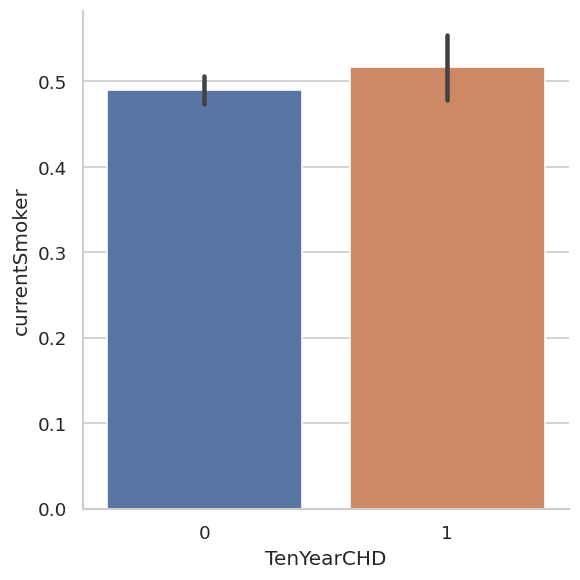

In [ ]:
sns.catplot(x='TenYearCHD',y='currentSmoker',kind = 'bar',data=framingham_dataset);

**Observações**

Nota-se que a distribuição ao longo das classes é bem semelhante, o que confirma a semelhança entre as amostras de cada classe no banco de dados. Outra forma de confirmarmos essa hipótese é através de um teste estatístico.

In [ ]:
current_smoker_chd = pd.crosstab(framingham_dataset['currentSmoker'],framingham_dataset['TenYearCHD'])

stat, p, dof, expected = chi2_contingency(current_smoker_chd.values)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
  print('reject H0')
else:
  print('fail to reject H0')

# interpretação do p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
  print('reject H0')
else:
  print('fail to reject H0')


probability=0.950, critical=3.841, stat=1.497
fail to reject H0
significance=0.050, p=0.221
fail to reject H0


**Observações**
Utilizamos o chi2 teste que é adequado para testes estatísticos de variáveis categóricas. Com base nos resultados, nota-se que não foi possível rejeitar a hipótese nula (H0), indicando que a distribuição das classes para essa feature possui a mesma natureza. Assim, confirmamos que a informação de atuais fumantes não é interessante para separar as classes estudadas nessa base de dados

---

3 - Há certo grupo demográfico com maior risco de desenvolver doenças cardíacas que os outros?

R - Quais os grupos demográficos encotrados na base de dados? Age, Gender e Education. Agora vamos analisar a relação entre essas variáveis e o rótulo de doença cardíaca. Primeiramente vamos dividir os dados em normais e patológicos

In [ ]:
normais = framingham_dataset[framingham_dataset['TenYearCHD']==0]

In [ ]:
patologicos = framingham_dataset[framingham_dataset['TenYearCHD']==1]

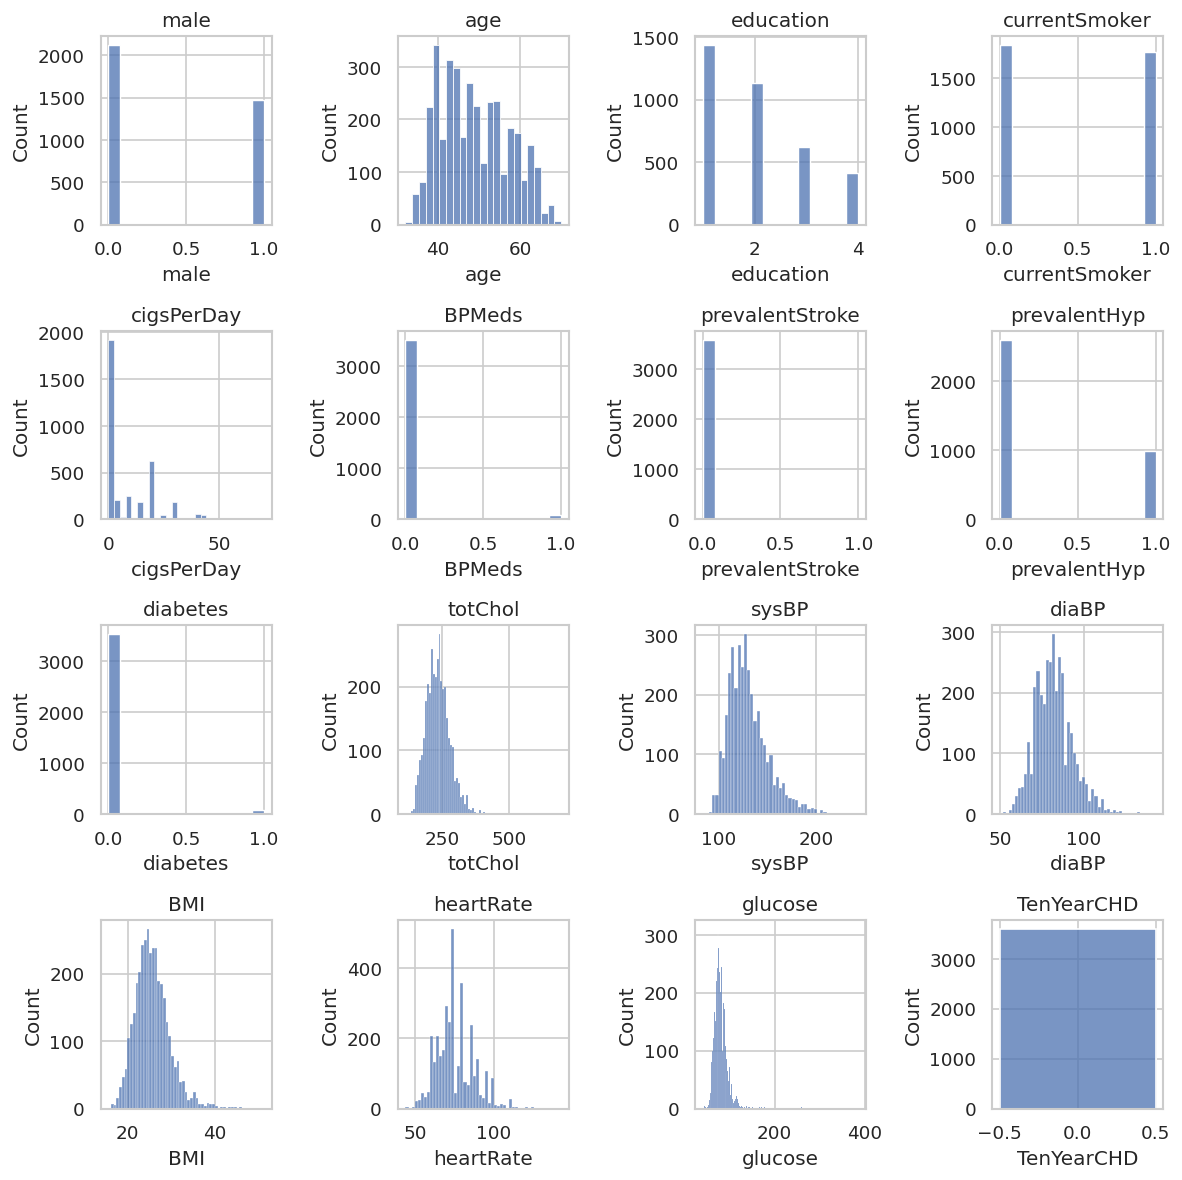

In [ ]:
fig=plt.figure(figsize=(10,10))
for number,column in enumerate(framingham_dataset.columns):
    ax=fig.add_subplot(4,4,number+1)
    palette = sns.cubehelix_palette(10,start=2,rot=0,dark=0,light=0.5)
    sns.histplot(normais[column],palette=palette)
    # df[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

**Observações**
Considerando as variáveis categóricas:

Gender:

Dentre os casos normais, há a prevalência de mulheres com relação a homens

Idade:

A idade está distribuída entre 40 e 60 anos, prevalecendo os mais novos nesse grupo

Educação:

A maior parte dos casos normais possuem educação básica, o que não significa como fator importante para a patologia estudada


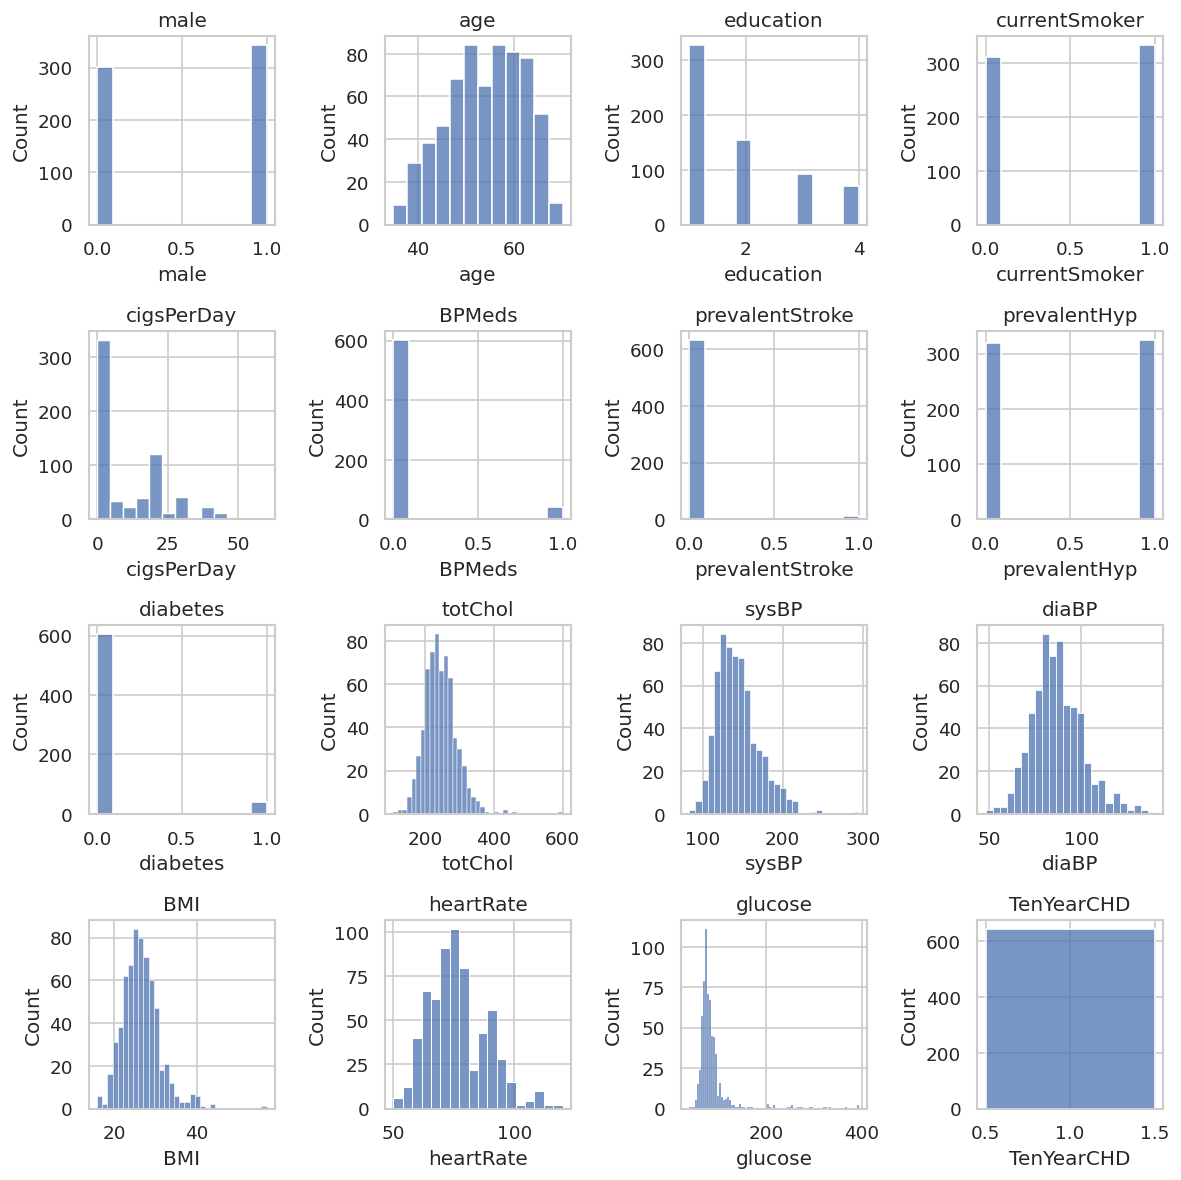

In [ ]:
fig=plt.figure(figsize=(10,10))
for number,column in enumerate(framingham_dataset.columns):
    ax=fig.add_subplot(4,4,number+1)
    palette = sns.cubehelix_palette(10,start=2,rot=0,dark=0,light=0.5)
    sns.histplot(patologicos[column],palette=palette)
    # df[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

**Observações**
Considerando as variáveis categóricas:

Gender:

Dentre os casos patolôgicos, há a prevalência de homens com relação a mulheres. Vale ressaltar que a amostra no geral possui mais mulheres do que homens, sendo um possível indicador de risco para a patologia. 

Idade
A idade está distribuída entre 40 e 60 anos, assimétricos para a direita da média, ou seja, idades maiores podem representar riscos para a patologia

Educação:

A maior parte dos casos patologicos possuem educação básica, o que não significa como fator importante para a patologia estudada

**Observações**

O plot abaixo confirma a análise realizada no item anterior

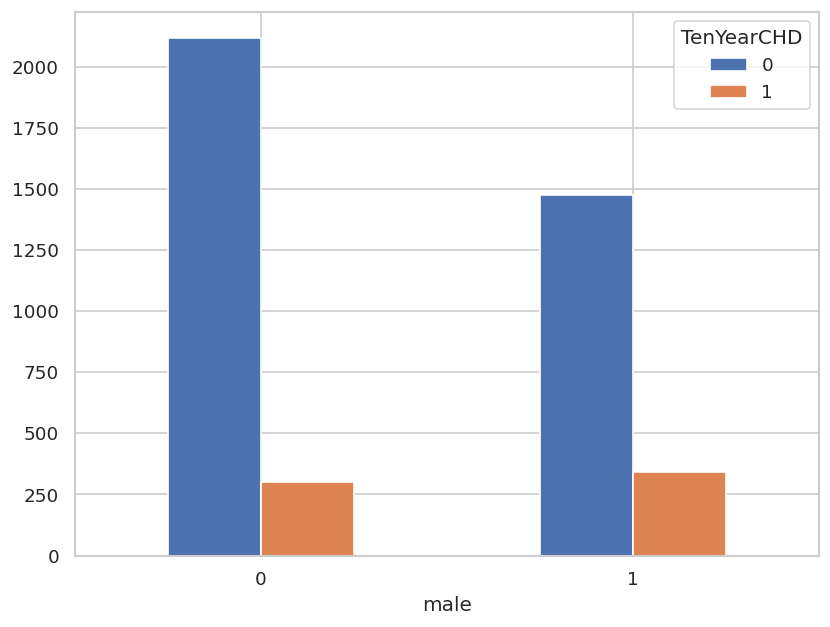

In [ ]:
male_chd_table = pd.crosstab(framingham_dataset['male'],framingham_dataset['TenYearCHD'])
male_chd_table
barplot = male_chd_table.plot.bar(rot=0)

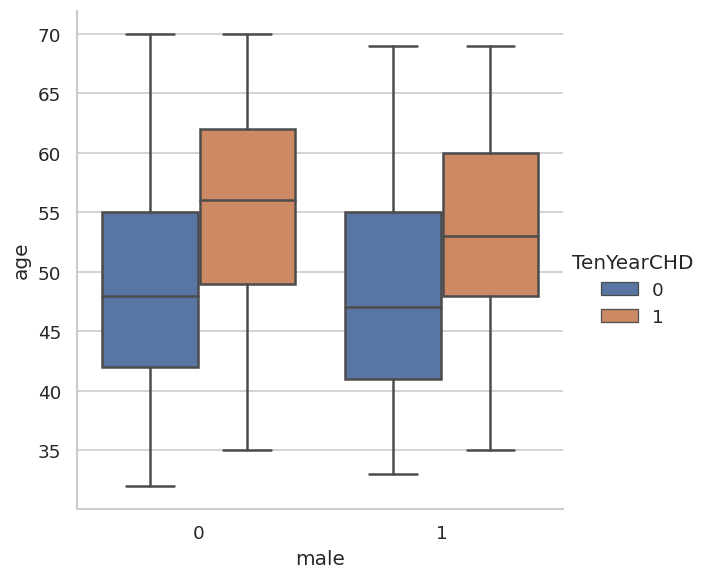

In [ ]:
sns.catplot(x="male", y="age", hue="TenYearCHD", kind="box", data=framingham_dataset);


**Interpretações**
Com base no boxplot acima, podemos verificar algumas questões:
 
 - 75% das mulheres que não possuem risco de doença coronária possuem ente 40 e 55 anos.
 
 - Já para as mulheres que possuem risco de doença coronária, 75% possuem entre 50 e 65 anos
 
 - Para os homens, 75% destes que não possuem risco de doença coronária, estão na faixa etária de idade entre 40 e 55 anos

- Já 75% dos homens com risco de doença coronária estão na faixa etária entre 45 e 60 anos


---


**Obs**

Para conferir tal comportamento, podemos filtrar os atributos e classes para termos subconjuntos que nos interessam. Assim é possível por exemplo capturar os dados de todos os homens ou mulheres que são normais e patológicos e tratar os dados conforme o nosso interesse.

In [ ]:
male = framingham_dataset[framingham_dataset['male']==1]
male_doente = male[framingham_dataset['TenYearCHD']==1]
male_saudavel = male[framingham_dataset['TenYearCHD']==0]







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
male_saudavel['age'].value_counts()

44    76
40    74
48    70
39    69
42    69
41    68
45    66
38    63
43    63
46    62
52    51
50    49
53    48
57    46
51    41
55    41
36    41
37    41
54    40
47    40
49    39
56    37
60    35
58    35
59    32
61    32
62    31
63    29
64    27
35    16
65    13
67     9
66     9
68     6
34     5
33     2
69     2
Name: age, dtype: int64

In [ ]:
male_doente['age'].value_counts()

51    21
52    19
50    17
60    16
56    16
58    15
62    15
54    14
49    14
48    14
59    12
47    12
63    12
57    12
61    11
44    10
42     9
64     9
53     8
65     8
67     8
41     8
43     8
55     8
45     8
68     6
38     6
40     6
46     5
66     5
39     4
37     3
36     2
35     1
69     1
Name: age, dtype: int64

In [ ]:
female = framingham_dataset[framingham_dataset['male']==0]
female_doente = female[framingham_dataset['TenYearCHD']==1]
female_saudavel = female[framingham_dataset['TenYearCHD']==0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
female_saudavel['age'].value_counts()


46    104
40    103
42     97
41     95
39     95
43     83
45     82
48     82
55     80
47     78
51     76
54     74
44     74
38     73
49     69
50     68
53     68
52     66
56     59
59     57
61     53
57     51
58     51
60     50
63     49
37     47
64     45
62     43
36     40
65     24
35     24
67     19
66     14
34     13
68      4
69      4
33      3
32      1
70      1
Name: age, dtype: int64

In [ ]:
female_doente['age'].value_counts()

63    20
59    18
55    16
58    16
53    15
61    14
57    14
52    13
65    12
64    12
47    11
46    11
56    11
49    10
62    10
60    10
66    10
40     9
67     9
51     8
48     7
45     6
44     6
50     6
42     5
43     5
54     4
41     3
39     2
38     2
68     2
36     1
70     1
37     1
35     1
Name: age, dtype: int64

4 - Pacientes com diabetes têm mais risco de desenvolver doenças cardíacas em idade mais baixa (abaixo de 25 anos)?

R - Com base em nossa análise descritiva anterior, a idade mínima nesse estudo é de 31 anos, logo não foram condizidos estudos para idades inferiores a essa. No entanto, podemos analisar alguns gráficos com base nos subgrupos. Primeiro vamos selecionar apenas os indivíduos Diabéticos.

---


In [ ]:
diabeticos = framingham_dataset[framingham_dataset['diabetes']==1]
diabeticos_normais = diabeticos[diabeticos['TenYearCHD']==0]
diabeticos_patologicos = diabeticos[diabeticos['TenYearCHD']==1]

**Observações**

Dentre os diabéticos saudáveis, vamos listar as idades 

In [ ]:
diabeticos_normais['age'].value_counts()


62    6
52    5
63    5
47    5
50    4
54    4
55    4
60    4
64    3
65    3
44    3
57    3
45    2
39    2
46    2
59    2
48    2
58    2
61    2
53    1
43    1
49    1
66    1
36    1
41    1
Name: age, dtype: int64

In [ ]:
diabeticos_patologicos['age'].value_counts()


52    5
47    4
58    4
53    3
62    3
56    3
68    2
61    2
66    2
65    2
59    1
50    1
44    1
67    1
55    1
57    1
43    1
40    1
48    1
63    1
Name: age, dtype: int64

In [ ]:
dataset_table = pd.crosstab(framingham_dataset['diabetes'],[framingham_dataset['TenYearCHD'],framingham_dataset['male']])
dataset_table

TenYearCHD     0          1     
male           0     1    0    1
diabetes                        
0           2080  1447  283  321
1             39    30   18   22

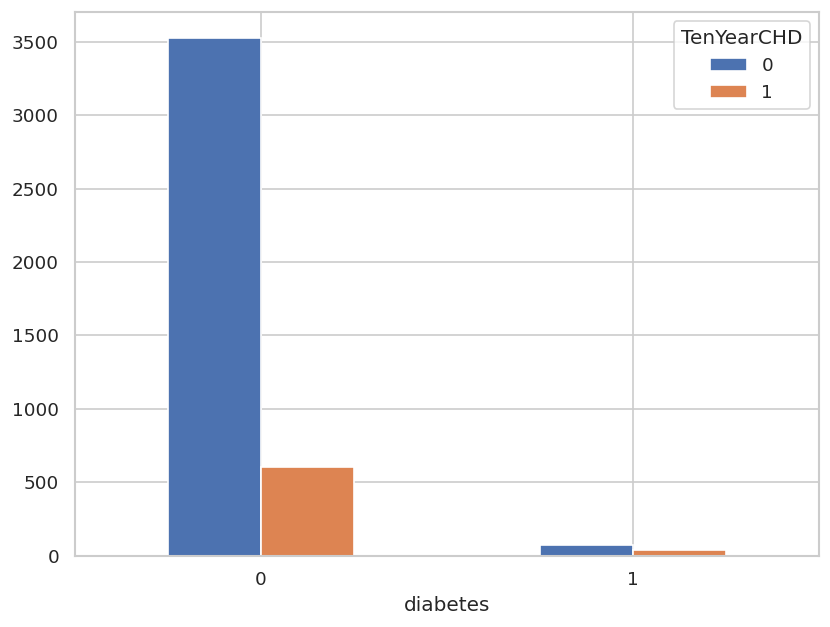

In [ ]:
diabetes_chd_table = pd.crosstab(framingham_dataset['diabetes'],framingham_dataset['TenYearCHD'])
diabetes_chd_table
barplot = diabetes_chd_table.plot.bar(rot=0)

**Análise**

Com base nesses valores e gráfico, nota-se que o fato de ser diabético não é um fator considerável para  doença cardíaca. Veja que tanto para indivíduos saudáveis como patológicos, os diabéticos são minoria. Fato que comprovado tanto pelo gráfico de correlação como pelo de importância de features